# Importações e configurações

In [160]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

from xgboost import XGBClassifier

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization

from tpot import TPOTClassifier

import matplotlib.pyplot as plt

import xgboost as xgb

from joblib import dump

import warnings

In [161]:
warnings.filterwarnings('ignore')

In [162]:
RANDOM_SEED = 42

# Carregando os dados

In [163]:
df = pd.read_excel("../data/cleaned_datas/cleaned_data.xlsx")

In [164]:
df

,Abastecimento de água_Fonte/água não tratada,Abastecimento de água_Outros,Abastecimento de água_Poço/água não tratada,Abastecimento de água_Rede geral/água tratada,Alimentação no ambiente escolar,Aluno contemplado com bolsa?,Auxílio digital_CHIP da RNP,Auxílio digital_Não foi contemplado,Auxílio digital_Valor para dispositivo,Auxílio digital_Valor para plano de dados,...,Sexo_Feminino,Sexo_Masculino,Turno_Integral,Turno_Manhã,Turno_Noite,Turno_Tarde,Você possui filhos entre 0 e 6 anos,Você possui filhos maiores que 6 anos,Você é chefe de família ou responsável pela própria subsistência?,"É cotista por renda inferior a 1,5 salário mínimo?"
0,False,False,False,True,0.0,False,False,True,False,False,...,True,False,False,False,True,False,0,0,False,True
1,False,False,False,True,0.0,True,False,True,False,False,...,False,True,False,True,False,False,0,0,False,True
2,False,False,False,True,0.0,True,False,True,False,False,...,True,False,False,True,False,False,0,0,False,True
3,False,False,True,False,50.0,True,False,True,False,False,...,True,False,False,False,True,False,0,0,False,True
4,False,False,False,True,50.0,True,False,False,False,False,...,True,False,False,False,False,True,0,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22090,False,False,False,True,45.0,True,False,True,False,False,...,False,True,False,False,False,True,0,0,False,False
22091,False,False,False,True,0.0,True,False,True,False,False,...,True,False,False,False,False,True,0,0,False,True
22092,False,True,False,False,10.0,True,False,True,False,False,...,True,False,False,False,True,False,0,2,True,True
22093,False,False,False,True,40.0,True,False,False,False,True,...,False,True,False,False,True,False,0,0,True,True


# Pré-processamento dos dados

## Dropando a coluna Relatos de vida (TEMPORÁRIO)

In [165]:
df = df.drop(columns=["Relato de vida"])

## Transformando float64 em float

In [166]:
df.dtypes

Abastecimento de água_Fonte/água não tratada                            bool
Abastecimento de água_Outros                                            bool
Abastecimento de água_Poço/água não tratada                             bool
Abastecimento de água_Rede geral/água tratada                           bool
Alimentação no ambiente escolar                                      float64
                                                                      ...   
Turno_Tarde                                                             bool
Você possui filhos entre 0 e 6 anos                                    int64
Você possui filhos maiores que 6 anos                                  int64
Você é chefe de família ou responsável pela própria subsistência?       bool
É cotista por renda inferior a 1,5 salário mínimo?                      bool
Length: 81, dtype: object

## Analisando correlação entre features

Por enquanto, vou manter sem o drop destas colunas correlacionadas.

In [167]:
"""
def get_highly_correlated_features(correlation_matrix, threshold):
  correlated_pairs = []
  for i in range(len(correlation_matrix.columns)):
    for j in range(i):
      if abs(correlation_matrix.iloc[i, j]) > threshold:
        pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
        coefficient = correlation_matrix.iloc[i, j]
        correlated_pairs.append((pair, coefficient))
  return sorted(correlated_pairs, key= lambda pair: pair[1], reverse=True)
"""

'\ndef get_highly_correlated_features(correlation_matrix, threshold):\n  correlated_pairs = []\n  for i in range(len(correlation_matrix.columns)):\n    for j in range(i):\n      if abs(correlation_matrix.iloc[i, j]) > threshold:\n        pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])\n        coefficient = correlation_matrix.iloc[i, j]\n        correlated_pairs.append((pair, coefficient))\n  return sorted(correlated_pairs, key= lambda pair: pair[1], reverse=True)\n'

In [168]:
"""
corr_matrix = df.corr().abs()
correlation_list = get_highly_correlated_features(corr_matrix, 0.95)
"""

'\ncorr_matrix = df.corr().abs()\ncorrelation_list = get_highly_correlated_features(corr_matrix, 0.95)\n'

In [169]:
#correlation_list[:10]

In [170]:
"""
f2drop = []
for feature_pair, _ in correlation_list:
  if feature_pair[0] not in f2drop and feature_pair[1] not in f2drop:
    f2drop.append(feature_pair[1])
"""

'\nf2drop = []\nfor feature_pair, _ in correlation_list:\n  if feature_pair[0] not in f2drop and feature_pair[1] not in f2drop:\n    f2drop.append(feature_pair[1])\n'

In [171]:
#f2drop

In [172]:
#df = df.drop(f2drop, axis='columns')

## Lidando com valores nulos

In [173]:
#imputer = KNNImputer(n_neighbors=3)

In [174]:
#df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

## Dividindo dados nos conjuntos de treino, validação e teste

In [175]:
labels = df[['Aluno contemplado com bolsa?']].copy()
df = df.drop(columns=['Aluno contemplado com bolsa?'])

In [176]:
#def convert_label(value):
#    return False if value <= 0.5 else True

In [177]:
labels

,Aluno contemplado com bolsa?
0,False
1,True
2,True
3,True
4,True
...,...
22090,True
22091,True
22092,True
22093,True


In [178]:
X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.1)#, random_state=RANDOM_SEED)

## Normalizando os dados numéricos

In [179]:
#numeric_columns = df.select_dtypes(include=['number']).columns

X_train_unormalized = X_train

scaler = StandardScaler()
scaler = scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Inteligências artificiais

## Funções de métricas

In [180]:
def get_overall_metrics(y_true, y_pred):
  tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
  acc = (tp+tn)/(tp+tn+fp+fn)
  tpr = tp/(tp+fn)
  fpr = fp/(fp+tn)
  precision = tp/(tp+fp)
  f1 = (2*tpr*precision)/(tpr+precision)
  return {'acc':acc,'tpr':tpr,'fpr':fpr,'precision':precision,'f1-score':f1}

In [181]:
def transform_prob_in_pred(probs):
    predict_list = list()
    for prob in probs:
        if prob[0] > prob[1]:
            predict_list.append(False)
        elif prob[0] < prob[1]:
            predict_list.append(True)

    predict_array = np.array(predict_list)
    return predict_array

## Modelos de aprendizagem de máquina clássicos

### Naive bayesian

#### Treinamento

In [182]:
model = GaussianNB()

In [183]:
model.fit(X_train, y_train)

GaussianNB()

#### Teste

In [184]:
y_pred_proba = model.predict_proba(X_test)

In [185]:
y_pred = model.predict(X_test)

In [186]:
class_labels = model.classes_
print(class_labels)

[False  True]


In [187]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8085972850678733
Precision: 0.8138209586124598
Recall: 0.8085972850678733


In [188]:
get_overall_metrics(y_test, y_pred)

{'acc': 0.8085972850678733,
 'tpr': 0.9362464183381088,
 'fpr': 0.4103194103194103,
 'precision': 0.7964655697745278,
 'f1-score': 0.8607178136318735}

### Logistic regression

#### Treinamento

In [189]:
model = LogisticRegression()

In [190]:
model.fit(X_train, y_train)

LogisticRegression()

#### Teste

In [191]:
class_labels = model.classes_
print(class_labels)

[False  True]


In [192]:
y_pred_proba = model.predict_proba(X_test)

In [193]:
y_pred = model.predict(X_test)

In [194]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8334841628959276
Precision: 0.8597996717984505
Recall: 0.8334841628959276


In [195]:
get_overall_metrics(y_test, y_pred)

{'acc': 0.8334841628959276,
 'tpr': 0.9892550143266475,
 'fpr': 0.43366093366093367,
 'precision': 0.7964244521337946,
 'f1-score': 0.8824281150159743}

### Random Forest

#### Treinamento

In [196]:
model = RandomForestClassifier(n_estimators=100)#, random_state=RANDOM_SEED)

In [197]:
model.fit(X_train, y_train)

RandomForestClassifier()

#### Teste

In [198]:
class_labels = model.classes_
print(class_labels)

[False  True]


In [199]:
y_pred_proba = model.predict_proba(X_test)

In [200]:
y_pred = model.predict(X_test)

In [201]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8221719457013574
Precision: 0.8311089846117392
Recall: 0.8221719457013574


In [202]:
get_overall_metrics(y_test, y_pred)

{'acc': 0.8221719457013574,
 'tpr': 0.9520057306590258,
 'fpr': 0.4004914004914005,
 'precision': 0.8030211480362538,
 'f1-score': 0.8711897738446411}

### Gradient Boost Machine

#### Treinamento

In [247]:
model = GradientBoostingClassifier(
    n_estimators= 75,
    learning_rate= 0.175,
    )#, random_state=RANDOM_SEED)

In [248]:
model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.175, n_estimators=75)

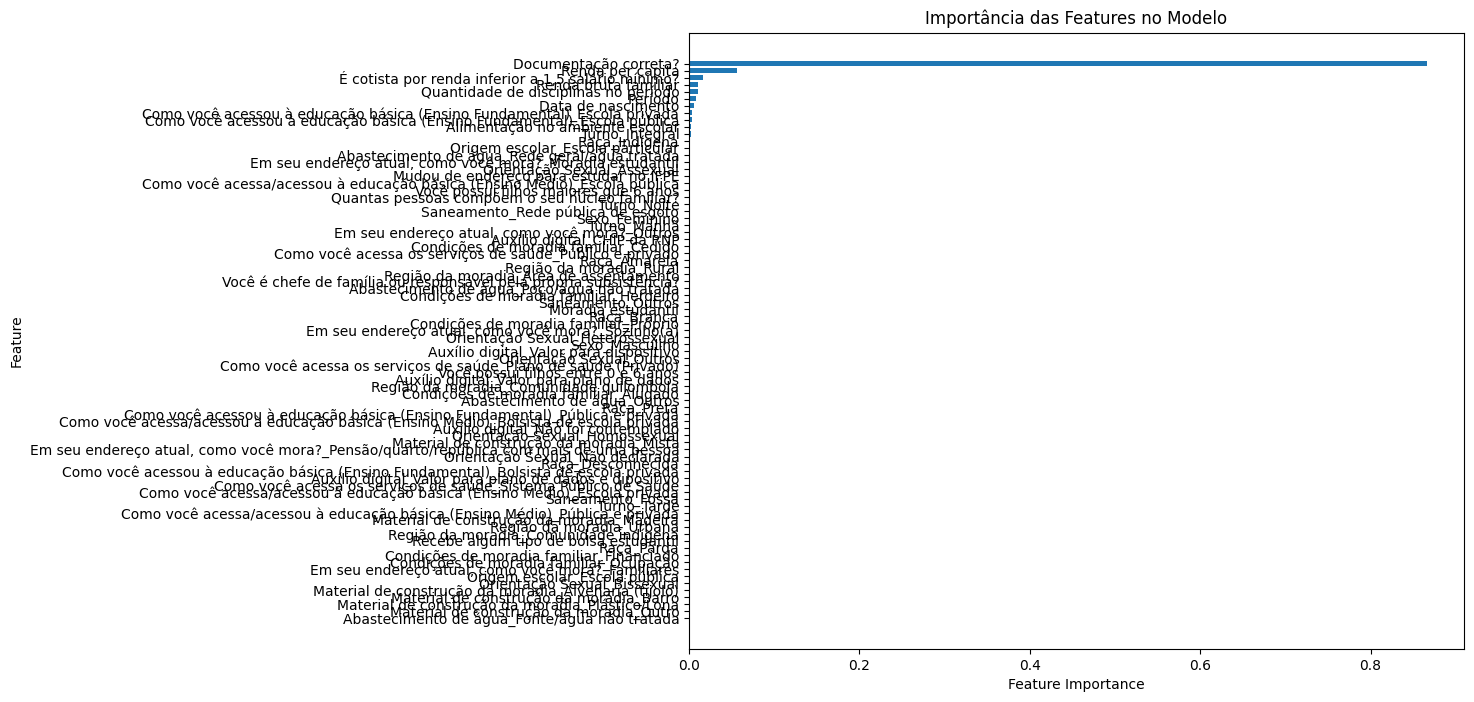

In [249]:
importance = model.feature_importances_

# Converter em DataFrame para facilitar a visualização
importance_df = pd.DataFrame({
    'Feature': X_train_unormalized.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Plotar a importância das features
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Importância das Features no Modelo")
plt.gca().invert_yaxis()  # Inverter a ordem para que a feature mais importante apareça no topo
plt.show()

#### Teste

In [250]:
class_labels = model.classes_
print(class_labels)

[False  True]


In [251]:
y_pred_proba = model.predict_proba(X_test)
y_pred_proba

array([[0.10780747, 0.89219253],
       [0.99047431, 0.00952569],
       [0.07421934, 0.92578066],
       ...,
       [0.20654835, 0.79345165],
       [0.13025676, 0.86974324],
       [0.07443804, 0.92556196]])

In [252]:
y_pred = model.predict(X_test)

In [253]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8321266968325792
Precision: 0.8554131136716827
Recall: 0.8321266968325792


In [254]:
get_overall_metrics(y_test, y_pred)

{'acc': 0.8321266968325792,
 'tpr': 0.9842406876790831,
 'fpr': 0.42874692874692877,
 'precision': 0.7974463145676146,
 'f1-score': 0.8810516191086888}

### Support Vector Machines

#### Treinamento

In [211]:
model = SVC(probability=True)#, random_state=RANDOM_SEED)

In [212]:
model.fit(X_train, y_train)

SVC(probability=True)

#### Teste

In [213]:
y_pred_proba = model.predict_proba(X_test)

In [214]:
y_pred = model.predict(X_test)

In [215]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8285067873303168
Precision: 0.8596603811512001
Recall: 0.8285067873303168


In [216]:
get_overall_metrics(y_test, y_pred)

{'acc': 0.8285067873303168,
 'tpr': 0.9935530085959885,
 'fpr': 0.45454545454545453,
 'precision': 0.7894137734775185,
 'f1-score': 0.8797970187123375}

### Cross Batch Model (XBM)

#### Treinamento

In [237]:
model = XGBClassifier(
    objective='binary:logistic',  # Problema de classificação binária
    booster='gbtree',             # Tipo de booster
    n_estimators=100,             # Número de árvores
    learning_rate=0.178,            # Taxa de aprendizado
    max_depth=6,                  # Profundidade máxima das árvores
    min_child_weight=10,           # Peso mínimo da criança
    gamma=0.5,                      # Redução mínima na função de perda para fazer uma divisão
    subsample=0.8,                # Fração de amostras usadas para ajustar cada árvore
    colsample_bytree=0.8,         # Fração de características usadas para cada árvore            
    alpha=1,                      # Regularização L1
    scale_pos_weight=1           # Peso para a classe positiva
    #random_state=RANDOM_SEED               # Semente para reprodutibilidade
    #n_jobs=6
)

In [238]:
model.fit(X_train, y_train)

XGBClassifier(alpha=1, base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.178, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

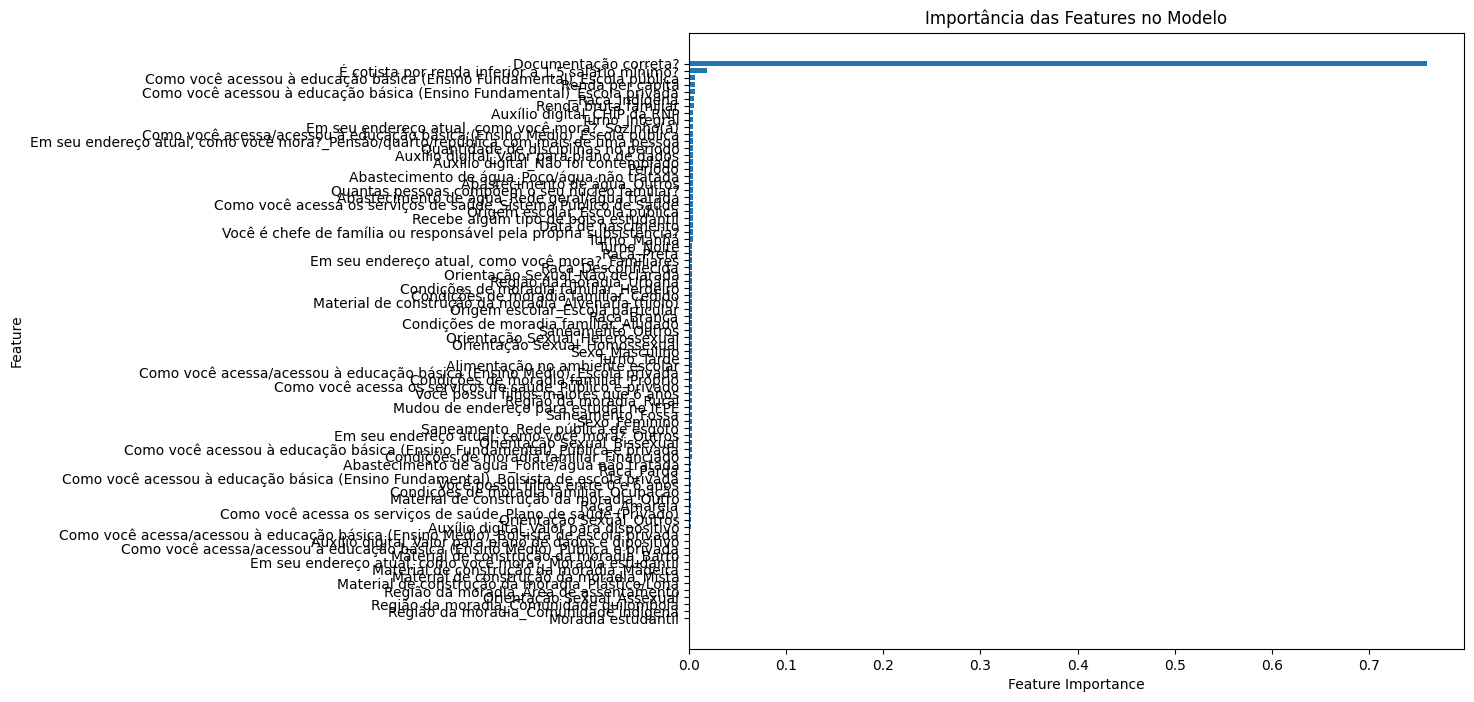

In [239]:
importance = model.feature_importances_

# Converter em DataFrame para facilitar a visualização
importance_df = pd.DataFrame({
    'Feature': X_train_unormalized.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Plotar a importância das features
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Importância das Features no Modelo")
plt.gca().invert_yaxis()  # Inverter a ordem para que a feature mais importante apareça no topo
plt.show()

#### Teste

In [240]:
y_pred_proba = model.predict_proba(X_test)

In [241]:
y_pred = model.predict(X_test)

In [242]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8307692307692308
Precision: 0.8464567418563169
Recall: 0.8307692307692308


In [243]:
get_overall_metrics(y_test, y_pred)

{'acc': 0.8307692307692308,
 'tpr': 0.9706303724928367,
 'fpr': 0.4090909090909091,
 'precision': 0.8027251184834123,
 'f1-score': 0.8787289234760052}

## Modelos de aprendizagem profunda

Configurações opcionais:

In [224]:
#labels = tf.keras.utils.to_categorical(labels, num_classes=2)

In [225]:
#labels = to_categorical(labels, num_classes=2)

### Rede neural simples (MLP)

#### Treinamento

In [226]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Camada de entrada com 1536 neurônios
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [227]:
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [228]:
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

In [229]:
model.fit(X_train, y_train, epochs=300, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/300


498/498 ━━━━━━━━━━━━━━━━━━━━ 1s 753us/step - accuracy: 0.5439 - loss: 0.7647 - val_accuracy: 0.7239 - val_loss: 0.5802
Epoch 2/300
498/498 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - accuracy: 0.7221 - loss: 0.5816 - val_accuracy: 0.8069 - val_loss: 0.4780
Epoch 3/300
498/498 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - accuracy: 0.7772 - loss: 0.5054 - val_accuracy: 0.8313 - val_loss: 0.4145
Epoch 4/300
498/498 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - accuracy: 0.8164 - loss: 0.4459 - val_accuracy: 0.8373 - val_loss: 0.3919
Epoch 5/300
498/498 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - accuracy: 0.8215 - loss: 0.4280 - val_accuracy: 0.8388 - val_loss: 0.3844
Epoch 6/300
498/498 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - accuracy: 0.8350 - loss: 0.4092 - val_accuracy: 0.8393 - val_loss: 0.3798
Epoch 7/300
498/498 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - accuracy: 0.8374 - loss: 0.3972 - val_accuracy: 0.8403 - val_loss: 0.3810
Epoch 8/300
498/498 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - accuracy: 0.8409 - loss: 0.3914 - val_

#### Teste

In [230]:
y_pred_proba = model.predict(X_test)

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step


In [231]:
y_pred = transform_prob_in_pred(y_pred_proba)

In [232]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8312217194570136
Precision: 0.8567042926889299
Recall: 0.8312217194570136


In [233]:
get_overall_metrics(y_test, y_pred)

{'acc': 0.8312217194570136,
 'tpr': 0.9871060171919771,
 'fpr': 0.43611793611793614,
 'precision': 0.7951529140219273,
 'f1-score': 0.8807925854905722}

## Aprendizagem de máquina automática (AutoML)

## Tpot

In [234]:
#tpot = TPOTClassifier(verbosity=2, generations=5, population_size=20)
#tpot.fit(X_train, y_train)

In [235]:
#print(tpot.score(X_test, y_test))

# Ordenação do dataframe

In [236]:
y_pred_proba = model.predict_proba(df)

AttributeError: 'Sequential' object has no attribute 'predict_proba'

In [ ]:
df['Nível de necessidade'] = y_pred_proba[:, 1]

In [ ]:
df_result = df.sort_values(by='Nível de necessidade', ascending=False)

In [ ]:
df_result.reset_index(drop=True, inplace=True)

In [ ]:
df_result

,Abastecimento de água_Fonte/água não tratada,Abastecimento de água_Outros,Abastecimento de água_Poço/água não tratada,Abastecimento de água_Rede geral/água tratada,Alimentação no ambiente escolar,Auxílio digital_CHIP da RNP,Auxílio digital_Não foi contemplado,Auxílio digital_Valor para dispositivo,Auxílio digital_Valor para plano de dados,Auxílio digital_Valor para plano de dados e dipositivo,...,Sexo_Masculino,Turno_Integral,Turno_Manhã,Turno_Noite,Turno_Tarde,Você possui filhos entre 0 e 6 anos,Você possui filhos maiores que 6 anos,Você é chefe de família ou responsável pela própria subsistência?,"É cotista por renda inferior a 1,5 salário mínimo?",Nível de necessidade
0,False,False,False,True,10.0,False,True,False,False,False,...,True,False,True,False,False,0,0,False,True,0.946738
1,False,False,False,True,10.0,False,True,False,False,False,...,True,False,True,False,False,0,0,False,True,0.942912
2,False,False,False,True,50.0,False,True,False,False,False,...,True,False,True,False,False,0,0,False,True,0.940457
3,False,False,False,True,90.0,False,True,False,False,False,...,False,False,False,False,True,0,0,True,True,0.926667
4,False,False,False,True,0.0,False,True,False,False,False,...,True,True,False,False,False,0,0,False,True,0.925987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17696,False,False,True,False,0.0,False,True,False,False,False,...,True,False,False,True,False,0,0,True,False,0.212941
17697,True,False,False,False,0.0,False,True,False,False,False,...,False,False,False,False,True,0,0,False,False,0.211544
17698,False,False,True,False,200.0,False,True,False,False,False,...,False,True,False,False,False,0,0,False,False,0.209711
17699,False,False,False,True,0.0,False,True,False,False,False,...,False,False,False,True,False,0,0,True,False,0.209091


In [ ]:
#df.to_excel('../data/cleaned_datas/sorted_cleaned_data.xlsx', index=False)

In [245]:
df

,Abastecimento de água_Fonte/água não tratada,Abastecimento de água_Outros,Abastecimento de água_Poço/água não tratada,Abastecimento de água_Rede geral/água tratada,Alimentação no ambiente escolar,Auxílio digital_CHIP da RNP,Auxílio digital_Não foi contemplado,Auxílio digital_Valor para dispositivo,Auxílio digital_Valor para plano de dados,Auxílio digital_Valor para plano de dados e dipositivo,...,Sexo_Feminino,Sexo_Masculino,Turno_Integral,Turno_Manhã,Turno_Noite,Turno_Tarde,Você possui filhos entre 0 e 6 anos,Você possui filhos maiores que 6 anos,Você é chefe de família ou responsável pela própria subsistência?,"É cotista por renda inferior a 1,5 salário mínimo?"
0,False,False,False,True,0.0,False,True,False,False,False,...,True,False,False,False,True,False,0,0,False,True
1,False,False,False,True,0.0,False,True,False,False,False,...,False,True,False,True,False,False,0,0,False,True
2,False,False,False,True,0.0,False,True,False,False,False,...,True,False,False,True,False,False,0,0,False,True
3,False,False,True,False,50.0,False,True,False,False,False,...,True,False,False,False,True,False,0,0,False,True
4,False,False,False,True,50.0,False,False,False,False,True,...,True,False,False,False,False,True,0,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22090,False,False,False,True,45.0,False,True,False,False,False,...,False,True,False,False,False,True,0,0,False,False
22091,False,False,False,True,0.0,False,True,False,False,False,...,True,False,False,False,False,True,0,0,False,True
22092,False,True,False,False,10.0,False,True,False,False,False,...,True,False,False,False,True,False,0,2,True,True
22093,False,False,False,True,40.0,False,False,False,True,False,...,False,True,False,False,True,False,0,0,True,True


In [255]:
dump(model, '../models/GBM_80c_a83.joblib')

['../models/GBM_80c_a83.joblib']

In [256]:
dump(scaler, '../models/scalers/std_scaler_GBM_80c_a83.pkl')

['../models/scalers/std_scaler_GBM_80c_a83.pkl']